In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\71591\Desktop\dataset\News_Category_Dataset_v3.json"
data = pd.read_json(file_path, lines=True)

# Display the structure of the dataset
data.info()

# Display sample records to understand the structure
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [2]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display the count of rows for each category
category_distribution = data['category'].value_counts()

# Display the results
missing_values, category_distribution


(link                 0
 headline             0
 category             0
 short_description    0
 authors              0
 date                 0
 dtype: int64,
 POLITICS          35602
 WELLNESS          17945
 ENTERTAINMENT     17362
 TRAVEL             9900
 STYLE & BEAUTY     9814
 PARENTING          8791
 HEALTHY LIVING     6694
 QUEER VOICES       6347
 FOOD & DRINK       6340
 BUSINESS           5992
 COMEDY             5400
 SPORTS             5077
 BLACK VOICES       4583
 HOME & LIVING      4320
 PARENTS            3955
 THE WORLDPOST      3664
 WEDDINGS           3653
 WOMEN              3572
 CRIME              3562
 IMPACT             3484
 DIVORCE            3426
 WORLD NEWS         3299
 MEDIA              2944
 WEIRD NEWS         2777
 GREEN              2622
 WORLDPOST          2579
 RELIGION           2577
 STYLE              2254
 SCIENCE            2206
 TECH               2104
 TASTE              2096
 MONEY              1756
 ARTS               1509
 ENVIRONMENT    

In [3]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Encode the categories as numerical labels
label_encoder = LabelEncoder()
data['category_encoded'] = label_encoder.fit_transform(data['category'])

# Tokenize and pad the `short_description` text
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data['short_description'])
sequences = tokenizer.texts_to_sequences(data['short_description'])

# Define the maximum sequence length 
max_sequence_length = 50
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_sequence_length)

# Save the tokenizer configuration for future use
tokenizer_config = tokenizer.to_json()

# Features and labels
X = padded_sequences
y = data['category_encoded']


In [4]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert labels to categorical (one-hot encoding) for neural network output
num_classes = len(label_encoder.classes_)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten

# Parameters
vocab_size = len(tokenizer.word_index) + 1  # Total vocabulary size (+1 for padding token)
embedding_dim = 128  # Dimension of embedding vectors
input_length = max_sequence_length  # Maximum length of input sequences
num_classes = len(label_encoder.classes_)  # Number of output categories

# Define the model
model = Sequential([
    # Embedding layer
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
    
    # Flatten the embedding output to feed into Dense layers
    Flatten(),
    
    # Fully connected Dense layers
    Dense(128, activation='relu'),  # First Dense layer
    Dropout(0.3),                  # Dropout layer
    
    Dense(64, activation='relu'),  # Second Dense layer
    Dropout(0.3),                  # Dropout layer

    Dense(32, activation='relu'),  # Third Dense layer
    Dropout(0.3),                  # Dropout layer
    
    # Output layer
    Dense(num_classes, activation='softmax')  # Final layer for classification
])

# Build the model explicitly
model.build(input_shape=(None, input_length))

# Compile the model
model.compile(
    optimizer='adam',  # Optimizer
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Performance metric
)


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
# Display model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 50, 128)             │      11,455,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 42)                  │           1,386 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,286,410 (46.87 MB)

 Trainable params: 12,286,410 (46.87 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Training parameters
batch_size = 32
epochs = 10  # Adjust based on dataset size and computational resources

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs
)


Epoch 1/10
5239/5239 ━━━━━━━━━━━━━━━━━━━━ 285s 54ms/step - accuracy: 0.2417 - loss: 3.0285 - val_accuracy: 0.3281 - val_loss: 2.5435
Epoch 2/10
5239/5239 ━━━━━━━━━━━━━━━━━━━━ 275s 53ms/step - accuracy: 0.3548 - loss: 2.4338 - val_accuracy: 0.3749 - val_loss: 2.4011
Epoch 3/10
5239/5239 ━━━━━━━━━━━━━━━━━━━━ 301s 57ms/step - accuracy: 0.4345 - loss: 2.0499 - val_accuracy: 0.3780 - val_loss: 2.4762
Epoch 4/10
5239/5239 ━━━━━━━━━━━━━━━━━━━━ 275s 53ms/step - accuracy: 0.4937 - loss: 1.7814 - val_accuracy: 0.3673 - val_loss: 2.6592
Epoch 5/10
5239/5239 ━━━━━━━━━━━━━━━━━━━━ 277s 53ms/step - accuracy: 0.5433 - loss: 1.5745 - val_accuracy: 0.3567 - val_loss: 2.8559
Epoch 6/10
5239/5239 ━━━━━━━━━━━━━━━━━━━━ 261s 50ms/step - accuracy: 0.5849 - loss: 1.4165 - val_accuracy: 0.3506 - val_loss: 3.1171
Epoch 7/10
5239/5239 ━━━━━━━━━━━━━━━━━━━━ 257s 49ms/step - accuracy: 0.6170 - loss: 1.3009 - val_accuracy: 0.3454 - val_loss: 3.2900
Epoch 8/10
5239/5239 ━━━━━━━━━━━━━━━━━━━━ 255s 49ms/step - accuracy: 

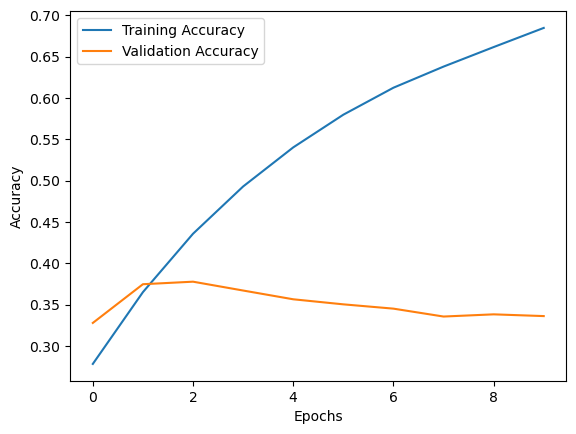

In [15]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

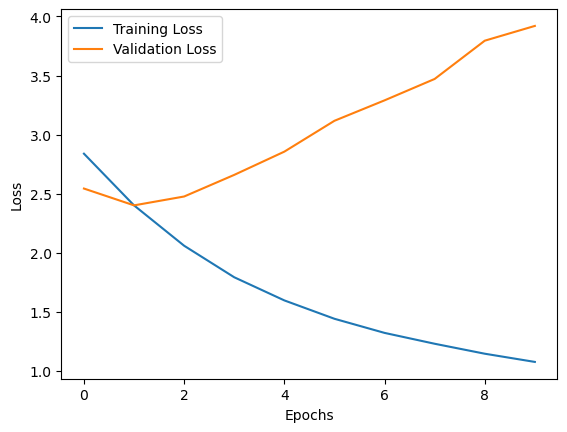

In [16]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()